# Terrorism Trends and Determinants

# GTD Dataset Visualization

In [15]:
# Data Management/Investigation
import wbdata
import pandas as pd
import numpy as np
#import country_converter as coco
import missingno as miss
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [ ]:
# import preprocessed file
gtdfinal = pd.read_csv('Data/gtdfinal.csv')

In [8]:
# Add column for civilian casualties
nkill = np.where(np.isnan(gtdfinal["nkill"]),0,gtdfinal["nkill"])
nkillter = np.where(np.isnan(gtdfinal["nkillter"]),0,gtdfinal["nkillter"])
gtdfinal["nkillciv"] = nkill-nkillter
gtdfinal["nkillciv"] = gtdfinal["nkillciv"].clip(lower=0)

# Add column for civilian injuries
nwound = np.where(np.isnan(gtdfinal["nwound"]),0,gtdfinal["nwound"])
nwoundte = np.where(np.isnan(gtdfinal["nwoundte"]),0,gtdfinal["nwoundte"])
gtdfinal["nwoundciv"] = nwound-nwoundte
gtdfinal["nwoundciv"] = gtdfinal["nwoundciv"].clip(lower=0)

## Part 1: GTD Data Exploration

In [10]:
sns.set_style("white")

In [148]:
# Incidents through time
df0=gtdfinal.groupby(["iyear","region_txt"])[["nkillciv"]].count().unstack()
df0=df0.droplevel(0,axis=1)
df0.index=df0.index.rename("Year")
df0ph=gtdfinal[gtdfinal["country_txt"]=="Philippines"].groupby("iyear")[["nkillciv"]].count()

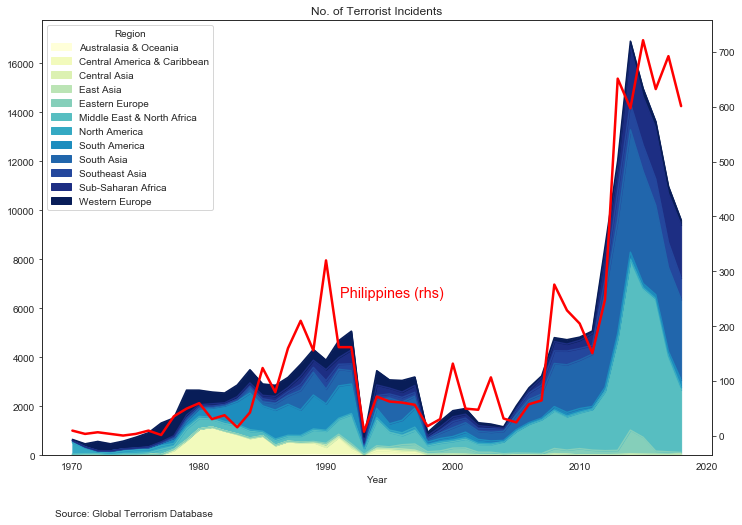

In [158]:
g=df0.plot(
    kind='area',
    figsize=(12,8),
    cmap='YlGnBu',
    title="No. of Terrorist Incidents"
)

g.legend(title="Region")
axes2=g.twinx()
p = axes2.plot(df0ph, c='red', label='Philippines',linewidth=2.5)
g = plt.figtext(0.14, 0.02, "Source: Global Terrorism Database")
g = plt.figtext(0.47, 0.4, "Philippines (rhs)",size="x-large",c="red")
plt.savefig("chart0.png",dpi=300,bbox_inches = "tight")

In [11]:
# Casualties through time
df1=gtdfinal.groupby(["iyear","region_txt"])[["nkillciv"]].sum().unstack()
df1=df1.droplevel(0,axis=1)
df1.index=df1.index.rename("Year")

In [12]:
df2=gtdfinal[gtdfinal["country_txt"]=="Philippines"].groupby("iyear")[["nkillciv"]].sum()

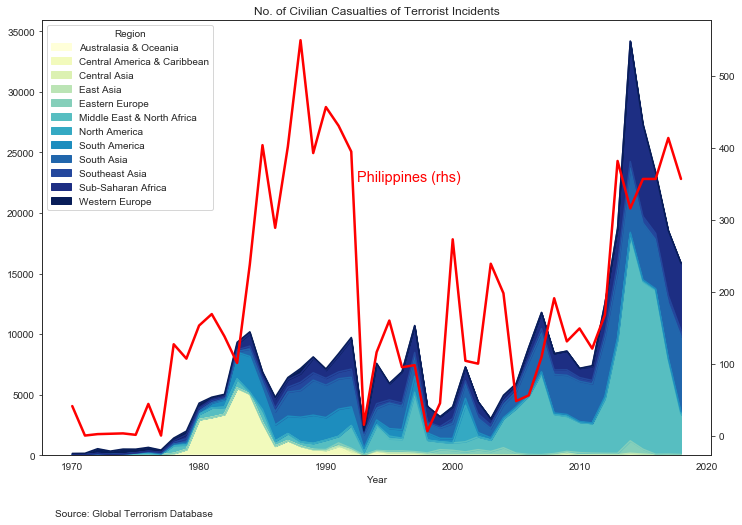

In [159]:
g=df1.plot(
    kind='area',
    figsize=(12,8),
    cmap='YlGnBu',
    title="No. of Civilian Casualties of Terrorist Incidents"
)

g.legend(title="Region")
axes2=g.twinx()
p = axes2.plot(df2, c='red', label='Philippines',linewidth=2.5)
g = plt.figtext(0.14, 0.02, "Source: Global Terrorism Database")
g = plt.figtext(0.49, 0.6, "Philippines (rhs)",size="x-large",c="red")
plt.savefig("chart1.png",dpi=300,bbox_inches = "tight")

In [17]:
df3=gtdfinal.groupby(["iyear","region_txt"])[["nwoundciv"]].sum().unstack()
df3=df3.droplevel(0,axis=1)
df3.index=df3.index.rename("Year")

In [18]:
df4=gtdfinal[gtdfinal["country_txt"]=="Philippines"].groupby("iyear")[["nwoundciv"]].sum()

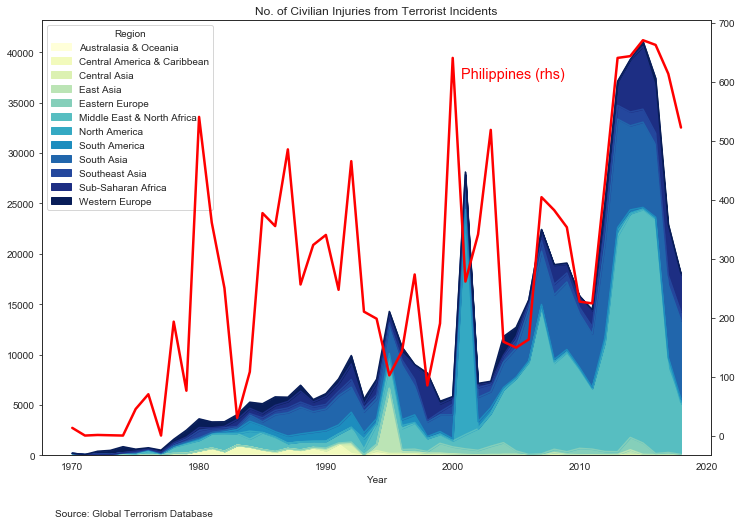

In [19]:
g=df3.plot(
    kind='area',
    figsize=(12,8),
    cmap='YlGnBu',
    title="No. of Civilian Injuries from Terrorist Incidents"
)

g.legend(title="Region")
axes2=g.twinx()
p = axes2.plot(df4, c='red', label='Philippines',linewidth=2.5)
g = plt.figtext(0.14, 0.02, "Source: Global Terrorism Database")
g = plt.figtext(0.61, 0.78, "Philippines (rhs)",size="x-large",c="red")

plt.savefig("chart2.png",dpi=300,bbox_inches = "tight")

In [80]:
df5=pd.crosstab(gtdfinal.country_txt,1).reset_index()
df5

col_0,country_txt,1
0,Afghanistan,14512
1,Albania,80
2,Algeria,2772
3,Andorra,1
4,Angola,503
...,...,...
200,Yemen,3679
201,Yugoslavia,205
202,Zaire,50
203,Zambia,62


In [81]:
df6=gtdfinal.groupby(["country_txt","region_txt"])[["nkillciv"]].sum().reset_index()
df6

,country_txt,region_txt,nkillciv
0,Afghanistan,South Asia,29306.0
1,Albania,Eastern Europe,39.0
2,Algeria,Middle East & North Africa,10928.0
3,Andorra,Western Europe,0.0
4,Angola,Sub-Saharan Africa,2923.0
...,...,...,...
200,Yemen,Middle East & North Africa,7375.0
201,Yugoslavia,Eastern Europe,94.0
202,Zaire,Sub-Saharan Africa,324.0
203,Zambia,Sub-Saharan Africa,70.0


In [82]:
df7 = pd.merge(df5, df6, on="country_txt", how="outer")

In [83]:
df7

,country_txt,1,region_txt,nkillciv
0,Afghanistan,14512,South Asia,29306.0
1,Albania,80,Eastern Europe,39.0
2,Algeria,2772,Middle East & North Africa,10928.0
3,Andorra,1,Western Europe,0.0
4,Angola,503,Sub-Saharan Africa,2923.0
...,...,...,...,...
200,Yemen,3679,Middle East & North Africa,7375.0
201,Yugoslavia,205,Eastern Europe,94.0
202,Zaire,50,Sub-Saharan Africa,324.0
203,Zambia,62,Sub-Saharan Africa,70.0


In [84]:
df7.columns=["Country","Terrorism Incidents","Region","Number of Fatalities"]
df7["World"] = "World"

In [138]:
fig = px.treemap(df7, path=['World', "Region","Country"], values='Terrorism Incidents',
                  color="Number of Fatalities",
                  color_continuous_scale='thermal')
fig.update_layout(
    title={
        'text': "Terrorism Incidents in the World (1970-2018)",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [240]:
# Get figures by weapon used in terrorism incident
df_weapon1=gtdfinal.groupby(["iyear","region_txt","weaptype1_txt"])[["eventid"]].count().reset_index()
df_weapon2=gtdfinal.groupby(["iyear","region_txt","weaptype2_txt"])[["eventid"]].count().reset_index()
df_weapon3=gtdfinal.groupby(["iyear","region_txt","weaptype3_txt"])[["eventid"]].count().reset_index()
df_weapon4=gtdfinal.groupby(["iyear","region_txt","weaptype4_txt"])[["eventid"]].count().reset_index()

# Make column names consistent
colnames=["Year","Location","Weapon Type","Count"]
df_weapon1.columns = colnames
df_weapon2.columns = colnames
df_weapon3.columns = colnames
df_weapon4.columns = colnames

# Consolidate
df_weapon_conso=pd.concat([df_weapon1,df_weapon2,df_weapon3,df_weapon4])

# Aggregate figures
df_weapon_conso=df_weapon_conso.groupby(["Year","Weapon Type"])[["Count"]].sum().reset_index()
df_weapon_conso["Location"] = "World"

In [242]:
# Get equivalent figures for the Philippines
df_weapon_ph1=gtdfinal[gtdfinal["country_txt"] == "Philippines"].groupby(["iyear","country_txt","weaptype1_txt"])[["eventid"]].count().reset_index()
df_weapon_ph2=gtdfinal[gtdfinal["country_txt"] == "Philippines"].groupby(["iyear","country_txt","weaptype2_txt"])[["eventid"]].count().reset_index()
df_weapon_ph3=gtdfinal[gtdfinal["country_txt"] == "Philippines"].groupby(["iyear","country_txt","weaptype3_txt"])[["eventid"]].count().reset_index()
df_weapon_ph4=gtdfinal[gtdfinal["country_txt"] == "Philippines"].groupby(["iyear","country_txt","weaptype4_txt"])[["eventid"]].count().reset_index()


# Make column names consistent
colnames=["Year","Location","Weapon Type","Count"]
df_weapon_ph1.columns = colnames
df_weapon_ph2.columns = colnames
df_weapon_ph3.columns = colnames
df_weapon_ph4.columns = colnames

# Consolidate
df_weapon_ph_conso=pd.concat([df_weapon_ph1,df_weapon_ph2,df_weapon_ph3,df_weapon_ph4])

# Aggregate figures
df_weapon_ph_conso=df_weapon_ph_conso.groupby(["Year","Location","Weapon Type"])[["Count"]].sum().reset_index()

In [243]:
df_weapon_conso=df_weapon_conso.append(df_weapon_ph_conso)

In [244]:
df_weapon_conso

,Year,Weapon Type,Count,Location
0,1970.0,Chemical,3,World
1,1970.0,Explosives,342,World
2,1970.0,Fake Weapons,1,World
3,1970.0,Firearms,95,World
4,1970.0,Incendiary,180,World
...,...,...,...,...
193,2018.0,Explosives,161,Philippines
194,2018.0,Firearms,427,Philippines
195,2018.0,Incendiary,34,Philippines
196,2018.0,Melee,9,Philippines


In [297]:
set(df_weapon_conso["Weapon Type"])

{'Biological',
 'Chemical',
 'Explosives',
 'Fake Weapons',
 'Firearms',
 'Incendiary',
 'Melee',
 'Other',
 'Radiological',
 'Sabotage Equipment',
 'Unknown',
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'}

In [301]:
df_weapon_conso["Weapon Type"]=df_weapon_conso["Weapon Type"].replace('Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)','Vehicle')

Text(0.5, 1.02, 'Weapon Use in Terrorism Incidents through Time')

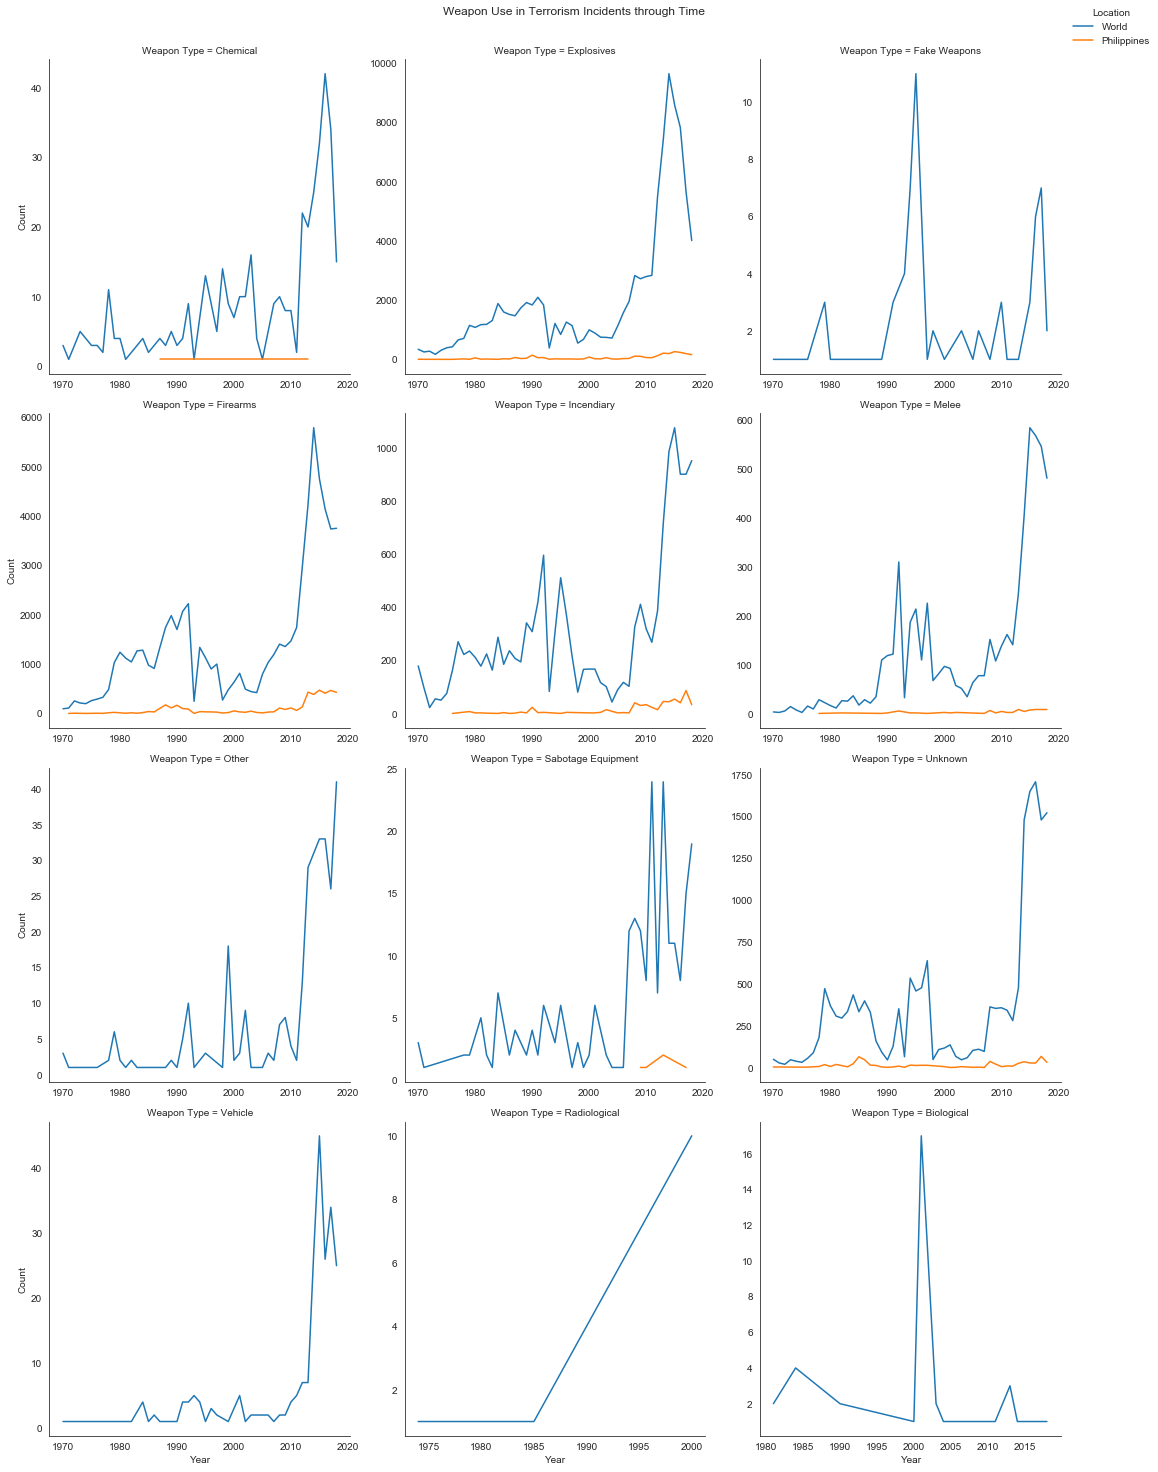

In [307]:
g = sns.FacetGrid(df_weapon_conso, col="Weapon Type", col_wrap=3, height=5, hue="Location",margin_titles=True,sharey=False,sharex=False)
g.map(sns.lineplot, "Year", "Count")
g.add_legend(loc="upper right")
g.fig.suptitle("Weapon Use in Terrorism Incidents through Time",y=1.02)

In [319]:
# Get figures by attack type
df_attack1=gtdfinal.groupby(["iyear","attacktype1_txt"])[["eventid"]].count().reset_index()
df_attack2=gtdfinal.groupby(["iyear","attacktype2_txt"])[["eventid"]].count().reset_index()
df_attack3=gtdfinal.groupby(["iyear","attacktype3_txt"])[["eventid"]].count().reset_index()

# Make column names consistent
colnames=["Year","Attack Type","Count"]
df_attack1.columns = colnames
df_attack2.columns = colnames
df_attack3.columns = colnames

# Consolidate
df_attack_conso=pd.concat([df_attack1,df_attack2,df_attack3])

# Aggregate figures
df_attack_conso=df_attack_conso.groupby(["Year","Attack Type"])[["Count"]].sum().reset_index()
df_attack_conso["Location"] = "World"

In [320]:
df_attack_conso

,Year,Attack Type,Count,Location
0,1970,Armed Assault,64,World
1,1970,Assassination,22,World
2,1970,Bombing/Explosion,334,World
3,1970,Facility/Infrastructure Attack,176,World
4,1970,Hijacking,11,World
...,...,...,...,...
431,2018,Hijacking,29,World
432,2018,Hostage Taking (Barricade Incident),55,World
433,2018,Hostage Taking (Kidnapping),959,World
434,2018,Unarmed Assault,83,World


In [321]:
# Get equivalent figures for the Philippines
df_attack_ph1=gtdfinal[gtdfinal["country_txt"] == "Philippines"].groupby(["iyear","country_txt","attacktype1_txt"])[["eventid"]].count().reset_index()
df_attack_ph2=gtdfinal[gtdfinal["country_txt"] == "Philippines"].groupby(["iyear","country_txt","attacktype2_txt"])[["eventid"]].count().reset_index()
df_attack_ph3=gtdfinal[gtdfinal["country_txt"] == "Philippines"].groupby(["iyear","country_txt","attacktype3_txt"])[["eventid"]].count().reset_index()

# Make column names consistent
colnames=["Year","Location","Attack Type","Count"]
df_attack_ph1.columns = colnames
df_attack_ph2.columns = colnames
df_attack_ph3.columns = colnames

# Consolidate
df_attack_ph_conso=pd.concat([df_attack_ph1,df_attack_ph2,df_attack_ph3])

# Aggregate figures
df_attack_ph_conso=df_attack_ph_conso.groupby(["Year","Location","Attack Type"])[["Count"]].sum().reset_index()

In [322]:
df_attack_conso=df_attack_conso.append(df_attack_ph_conso)

In [323]:
set(df_attack_conso["Attack Type"])

{'Armed Assault',
 'Assassination',
 'Bombing/Explosion',
 'Facility/Infrastructure Attack',
 'Hijacking',
 'Hostage Taking (Barricade Incident)',
 'Hostage Taking (Kidnapping)',
 'Unarmed Assault',
 'Unknown'}

Text(0.5, 1.02, 'Types of Terrorism Attacks through Time')

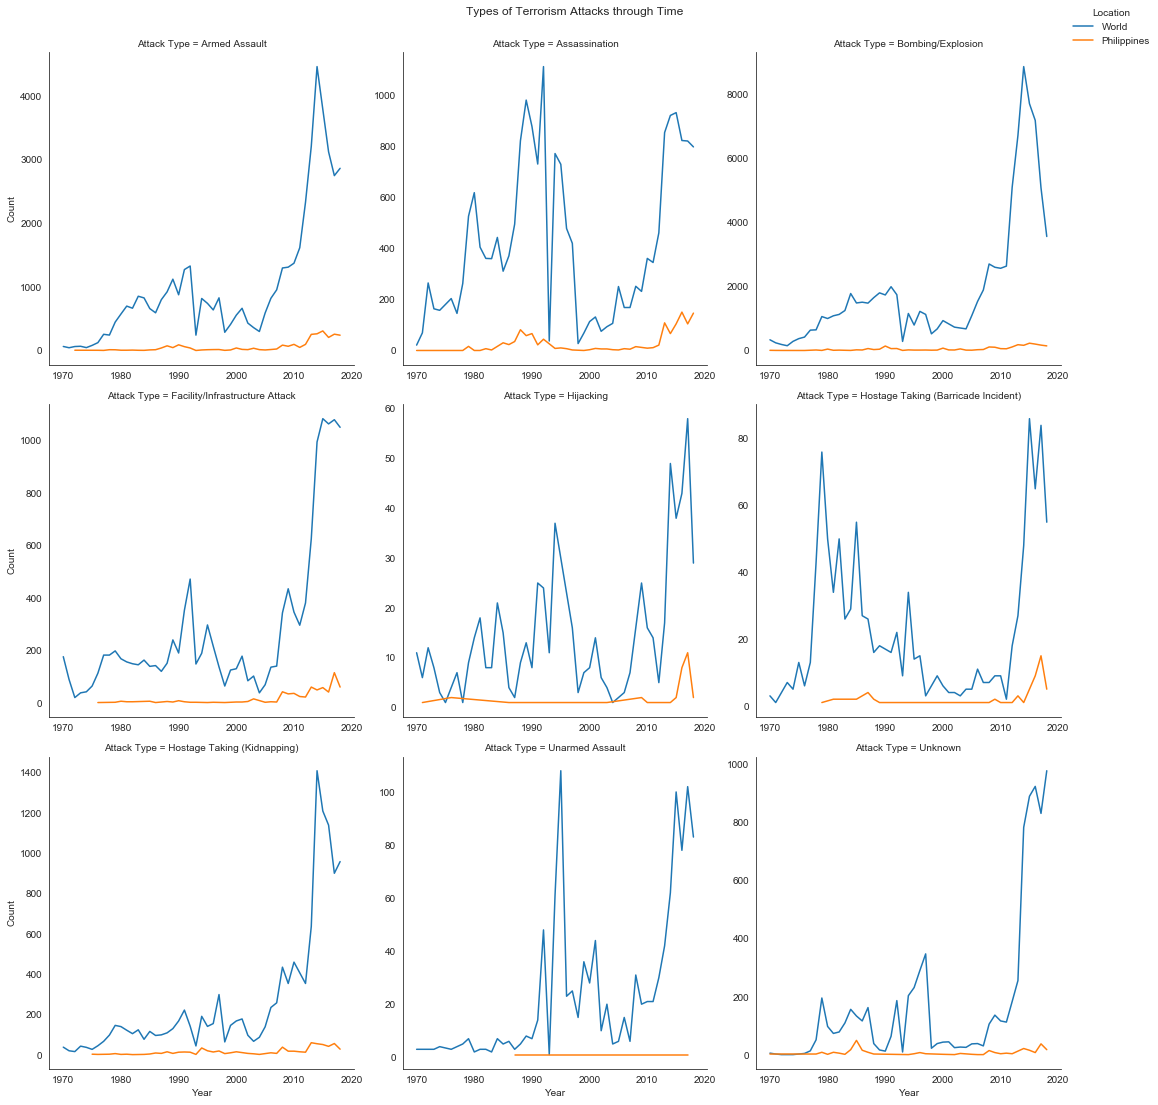

In [325]:
g = sns.FacetGrid(df_attack_conso, col="Attack Type", col_wrap=3, height=5, hue="Location",margin_titles=True,sharey=False,sharex=False)
g.map(sns.lineplot, "Year", "Count")
g.add_legend(loc="upper right")
g.fig.suptitle("Types of Terrorism Attacks through Time",y=1.02)